In [2]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.width', 55)
import seaborn as sns
import matplotlib.pyplot as plt

# df of mape
df_raw = pd.read_csv(r"/workspaces/ml-for-forecasting/multivariate/evaluations/mape.csv")
df = df_raw.copy(deep = True)
df = df.drop(columns='fname', axis=1)
df

,ridge,rf,lr,gb,xbg,dt,lasso,enr,knn
0,0.297090,0.336224,0.313149,0.342307,0.353002,0.036192,0.330935,0.335265,0.331365
1,0.113383,0.033208,0.113422,0.050760,0.049737,0.151904,0.111640,0.111732,0.023802
2,0.493418,0.507150,0.478956,0.504541,0.489421,0.029591,0.514244,0.514431,0.487462
3,0.092271,0.082229,0.077455,0.085359,0.081496,0.024763,0.095410,0.094574,0.076495
4,9.390467,9.051578,9.391271,9.044344,9.038610,0.042021,9.386164,9.386273,9.110398
...,...,...,...,...,...,...,...,...,...
245,0.053444,0.052840,0.053471,0.046535,0.061223,0.053053,0.056624,0.056636,0.081664
246,0.486131,0.489711,0.481690,0.486406,0.483616,0.030520,0.481984,0.481984,0.494201
247,0.642267,0.666617,0.642186,0.667711,0.675026,0.073759,0.646031,0.645874,0.678776
248,0.874687,0.819395,2.238234,0.720988,0.812403,0.202961,0.994137,0.914749,1.034848


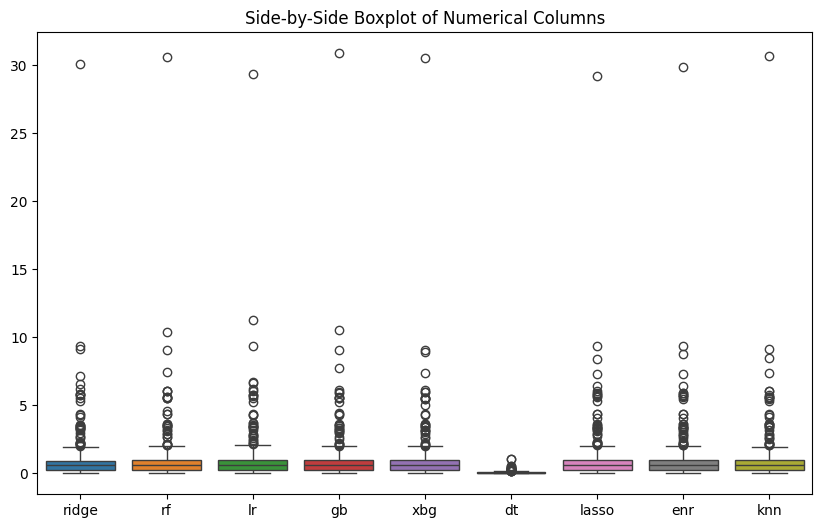

In [3]:
# Assuming df is your dataframe
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)

# Show the plot
plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

In [4]:
import pandas as pd


# Function to detect and remove outliers using the IQR method
def remove_outliers_iqr(df):
    df = df.copy(deep=True)
    for col in df.select_dtypes(
        include="number"
    ).columns:  # Loop through each numerical column
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows where the value in this column is an outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df


# Assuming df is your original DataFrame
df_clean = remove_outliers_iqr(df)
df_clean


,ridge,rf,lr,gb,xbg,dt,lasso,enr,knn
0,0.297090,0.336224,0.313149,0.342307,0.353002,0.036192,0.330935,0.335265,0.331365
1,0.113383,0.033208,0.113422,0.050760,0.049737,0.151904,0.111640,0.111732,0.023802
2,0.493418,0.507150,0.478956,0.504541,0.489421,0.029591,0.514244,0.514431,0.487462
3,0.092271,0.082229,0.077455,0.085359,0.081496,0.024763,0.095410,0.094574,0.076495
5,0.656747,0.824017,0.671659,0.813268,0.829759,0.092371,0.687031,0.652211,0.790817
...,...,...,...,...,...,...,...,...,...
244,0.092524,0.101513,0.081904,0.108441,0.117139,0.076814,0.092380,0.089747,0.034640
245,0.053444,0.052840,0.053471,0.046535,0.061223,0.053053,0.056624,0.056636,0.081664
246,0.486131,0.489711,0.481690,0.486406,0.483616,0.030520,0.481984,0.481984,0.494201
247,0.642267,0.666617,0.642186,0.667711,0.675026,0.073759,0.646031,0.645874,0.678776


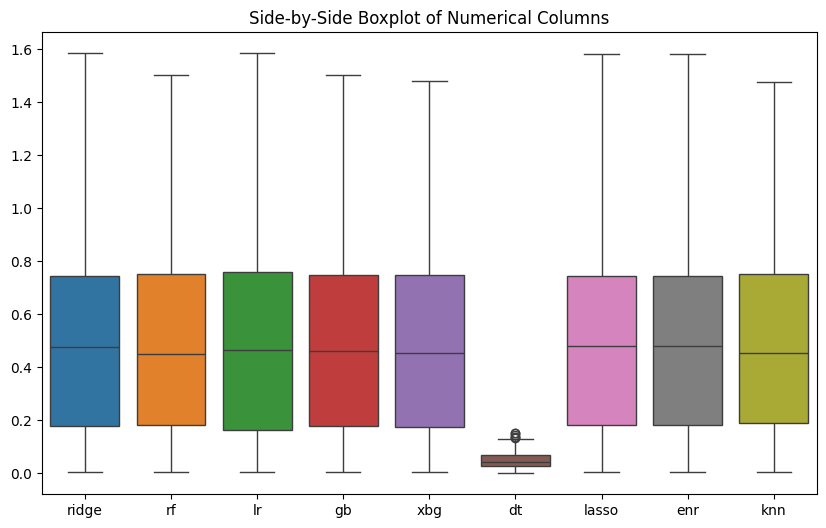

In [5]:
# Assuming df is your dataframe
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean)

# Show the plot
plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

In [6]:
df_clean.mean()

ridge    0.490084
rf       0.489806
lr       0.496217
gb       0.488404
xbg      0.489516
dt       0.049417
lasso    0.486014
enr      0.488588
knn      0.486603
dtype: float64

In [ ]:
len(df_clean)

187